 #### 1.a 

In [435]:
def F(n):
    s  =  " "
    a  =  1
    ch  =  65
    for i in range(1,n+1):
        print((n-i)*s, end = '')
        for j in range(1, a+1):
            if j <= (a+1)/2:
                print(chr(ch+i-j), end = '')
            else:
                print(chr(ch+j-(a+1)//2), end = '')
        a +=  2
        print()
#tests
F(10)
F(6)

         A
        BAB
       CBABC
      DCBABCD
     EDCBABCDE
    FEDCBABCDEF
   GFEDCBABCDEFG
  HGFEDCBABCDEFGH
 IHGFEDCBABCDEFGHI
JIHGFEDCBABCDEFGHIJ
     A
    BAB
   CBABC
  DCBABCD
 EDCBABCDE
FEDCBABCDEF


#### 1.b

In [436]:
def F(d : dict):
    keys  =  sorted(d.keys())
    l  =  []
    print("by keys:")
    for i in keys:
        print(i, d[i][0],d[i][1])
        l.append((d[i][0], d[i][1], i))
    x  =  sorted(l, key  =  lambda x : x[0], reverse  =  True)
    y  =  sorted(l, key  =  lambda x : x[1])
    print("by x-s:")
    for j in range(len(x)):
        print(x[j][2], x[j][0], x[j][1])
    print("by y-s:")
    for k in range(len(y)):
        print(y[k][2], y[k][0], y[k][1])

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

by keys:
1 1 2
2 -1 4
4 2 3
5 -4 3
by x-s:
4 2 3
1 1 2
2 -1 4
5 -4 3
by y-s:
1 1 2
4 2 3
5 -4 3
2 -1 4
by keys:
-8 4 2
5 9 -10
6 -3 4
7 2 1
by x-s:
5 9 -10
-8 4 2
7 2 1
6 -3 4
by y-s:
5 9 -10
7 2 1
-8 4 2
6 -3 4


#### 3.a

In [437]:
import numpy as np
from scipy.optimize import minimize

def f(r):
    x, y = r
    return (2*(x - y - 3)**2 + 4*(x+ 2*y + 2)**4)

def constraints(r):
    x, y = r
    return (x - y - 3, (x+2)**2 + (y + 1)**2 <= 5) 

con = {'type': 'eq', 'fun': constraints}
result = minimize(f, [0,0], constraints = [con], method = 'BFGS') # BFGS returned smallest value/other methods encountered errors
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.186359633205311e-09
        x: [ 1.331e+00 -1.669e+00]
      nit: 16
      jac: [-2.924e-06 -5.848e-06]
 hess_inv: [[ 3.016e+01  2.999e+01]
            [ 2.999e+01  3.007e+01]]
     nfev: 57
     njev: 19


C:\Users\Ram Jyothy\AppData\Local\Temp\ipykernel_22140\1926324383.py:13: RuntimeWarning: Method BFGS cannot handle constraints.
  result = minimize(f, [0,0], constraints = [con], method = 'BFGS') # BFGS returned smallest value/other methods encountered errors


#### 3.b

In [438]:
from scipy.integrate import quad
import numpy as np
import math
def f(x, y): # the scalar function
    return x**2 + y**4

def g(r, u): # path paramterization; ndarrays returned
    return (r*np.cos(u), r*np.sin(u))

def d_l(r, t, x): 
    a, b = g(r, t)
    k = np.abs(t - x) # index of element closest to x can be extracted 
    return (np.gradient(a, t)[np.argmin(k)]**2 + np.gradient(b, t)[np.argmin(k)]**2)**0.5  # gradeint as function of x, effectively

def integrand(x, r): # integrand as function of x
    v=np.linspace(0, 2*np.pi, 100)
    return f(float(g(r, x)[0]), float(g(r, x)[0])) * d_l(r, v, x) 

radius=3**0.5
print(quad(integrand, 0, 2 * math.pi, args=(radius,)))
    

(53.018685546149165, 2.551405713023626e-08)


#### 4.

In [439]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt
import random

In [440]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    f  =  open(data_path, 'r')
    l  =  f.readlines()
    data  =  []
    
    for chunk in l: # could not think of loop-less way
        x, y  =  ((chunk.strip()).strip('+')).split(',')
        data.append([float(x), float(y)])
    
    return np.array(data)


In [441]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers = None):
    if init_centers:
        cent = np.array(random.sample(init_centers, K))
    else:
        cent = np.array(random.sample(sorted(data.tolist()), K))
    return cent

In [442]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [443]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    v = data-np.split(centers, centers.shape[0]) # components of vectors joining centers to points, grouped by center
    return ((np.sum(v**2, axis = 2))**0.5).T # transpose for grouping distances by point

In [444]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis  =  1) # indices correspond to center labels (0,1,...K-1)

In [445]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    i = np.zeros(K)
    k = np.argsort(labels)
    s_labels = labels[k]
    s_data = data[s_labels] # data points sorted according to centers, in ascending order of labels
    a,c = np.unique(s_labels, return_index = True)
    i = np.split(s_data,c[1:]) # data points grouped according to centers, in seperate -1x2 arrays
    l = np.zeros((K, 2)).tolist() # for ease of indexing
    n = 0
    for array in i: # another loop I was unable to replace
        l[int(a[n])] = (np.sum(array, axis = 0)/array.shape[0]) # centers with no points assigned to them are resest to
        n += 1
    l = np.array(l)
    return l

In [446]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if (labels1 == labels2).all():
        return True
    else:
        return False

In [447]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 


In [448]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    
    plt.title(str(centers.shape[0])+'-means clustering')
    
    ### Set xlabel as 'Longitude'
    
    plt.xlabel('Longitude')
    
    ### Set ylabel as 'Latitude'
    
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    
    plt.savefig(fname=(str(centers.shape[0])+'means.png'))


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.004531383514404297


<module 'matplotlib.pyplot' from 'c:\\Users\\Ram Jyothy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

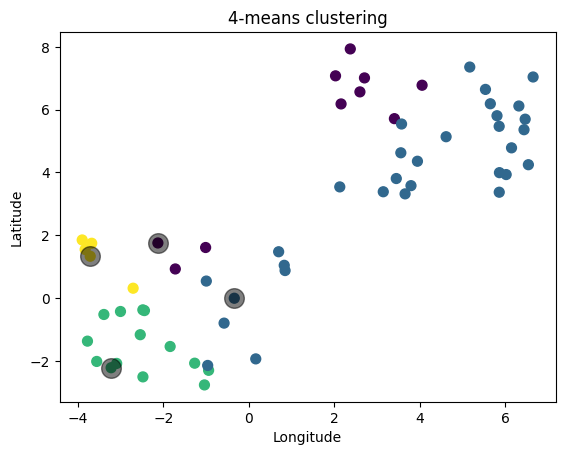

In [449]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 4, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)